<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [16]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [17]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [18]:

df['species'] = df['species'].str.lower() #todos los datos del atributo 'species' en minúscula
df['species'] = df['species'].str.strip() #eliminamos los espacios extras en los datos del atributo 'species'
df['species'].fillna("default",inplace = True) #los valores de nan quedan reemplazados por 'default'

cant_especies=len(df['species'].unique()) #calculamos el largo de la columna 'species'
print("La cantidad de elementos en la columna 'species' es:",cant_especies)

La cantidad de elementos en la columna 'species' es: 4


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

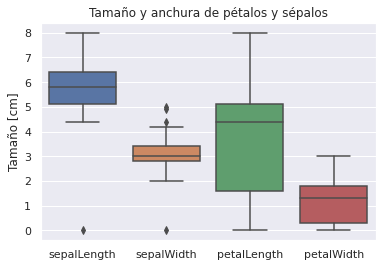

In [19]:
df ['sepalLength'] = df ['sepalLength']. fillna(0.0) #se reemplaza el valor nan por un 0
df ['sepalWidth'] = df ['sepalWidth']. fillna(0.0)
df ['petalLength'] = df ['petalLength']. fillna(0.0)
df ['petalWidth'] = df ['petalWidth']. fillna(0.0)

sns.boxplot(data=df)
plt.title('Tamaño y anchura de pétalos y sépalos') #nombre del gráfico
plt.ylabel('Tamaño [cm]')
plt.show() #se muestra el gráfico

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [20]:
Label = []
for k in range(len(df)): 
  if (df['sepalLength'][k]>7.0 or df['sepalLength'][k]<4.0) or (df['sepalWidth'][k]>4.5 or df['sepalLength'][k]<2.0) or (df['petalLength'][k]>7.0 or df['petalLength'][k]<1.0) or (df['petalWidth'][k]>2.5 or df['petalWidth'][k]<0.1):
    Label.append("Fail") #el dato está fuera del rango de valores válidos
  else:
    Label.append("Pass") #el dato está dentro del rango de valores válidos

df["label"]=Label
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,Fail
1,7.2,3.6,6.1,2.5,virginica,Fail
2,6.3,3.3,6.0,2.5,virginica,Pass
3,6.7,3.3,5.7,2.5,virginica,Pass
4,6.3,3.4,5.6,2.4,virginica,Pass
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Pass
146,4.8,3.0,1.4,0.1,setosa,Pass
147,4.9,3.1,1.5,0.1,setosa,Pass
148,4.9,3.6,1.4,0.1,setosa,Pass


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

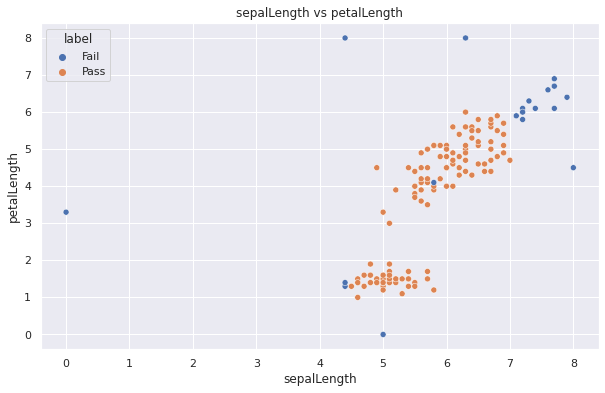

In [21]:
plt.figure(figsize=(10, 6)) #Asignamos el tamaño
sns.scatterplot( #Creamos el grafico de dispersión
    x='sepalLength',
    y='petalLength',
    hue='label', #color por pass y fail
    data=df,
)
plt.title('sepalLength vs petalLength')
plt.show()

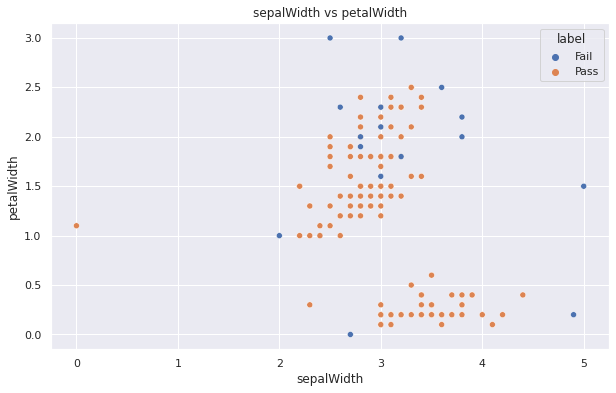

In [22]:

plt.figure(figsize=(10, 6)) #Asignamos el tamaño
sns.scatterplot( #Creamos el grafico de dispersión
    x='sepalWidth',
    y='petalWidth',
    hue='label', #color por pass y fail
    data=df,
)
plt.title('sepalWidth vs petalWidth')
plt.show()

#Conclusión:

En el primer gráfico vemos que la mayor parte de datos que están fuera del rango de valores válidos se acumulan para valores altos de los atributos 'sepalLenght' y 'petalLenght'.

En el segundo gráfico vemos que la mayor parte de datos que están fuera del rango de valores válidos se acumulan para valores medios de los atributos 'sepalWidth' y 'petalWidth'.

Por otro lado, es fácil notar que la dispersión de los datos con la etiqueta 'Fail' es menor en el primer gráfico.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

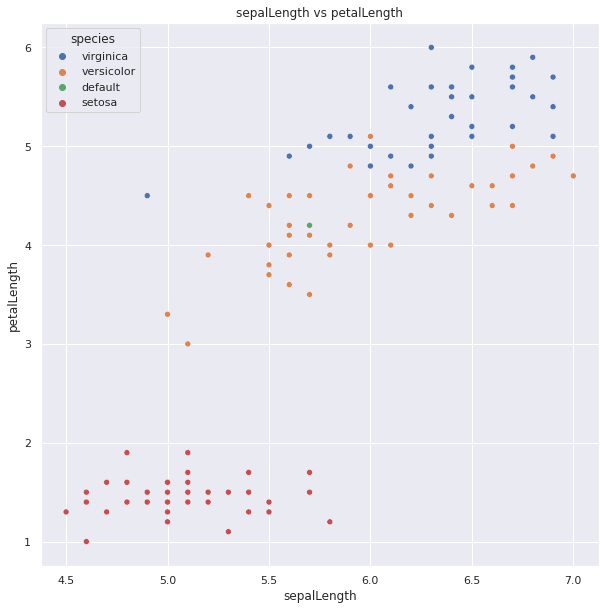

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
df_specie=df.loc[df['label']=='Pass'] #filtrado

sns.scatterplot(
        x='sepalLength',
        y='petalLength',
        data=df_specie,
        hue='species',
)
plt.title('sepalLength vs petalLength')
plt.show()